## OpenCV图像读取、显示和存储

OpenCV：Open Source Computer Vision（开源计算机视觉处理库）

# 目标
- 在这里你将学会怎样读入一幅图像，怎样显示一幅图像，以及如何保存一幅图像
- 你将要学习如下函数：cv2.imread()，cv2.imshow()，cv2.imwrite()
- 如果你愿意的话，我会叫你如何使用Matplotlib显示一幅图片

## 1.1读入图像

#### 使用函数cv2.imread()读入图像。这幅图像应该在此程序的工作路径，或者给函数提供完整路径，
#### 第二个参数是要告诉函数应该如何读取这幅图片。
- cv2.IMREAD_COLOR：读入一副彩色图像。图像的透明度会被忽略，这是默认参数。
- cv2.IMREAD_GRAYSCALE：以灰度模式读入图像
- cv2.IMREAD_UNCHANGED：读入一幅图像，并且包括图像的alpha通道

In [8]:
import numpy as np 
import cv2
#Loadancolorimageingrayscale
img=cv2.imread('messi5.jpg',0)#read image 1. name   2. 0 gray 1 color

<font color=red>警告：就算图像的路径是错的，OpenCV也不会提醒你的，但是当你使用命令print img时得到的结果是None。</font>

## 1.2显示图像

使用函数cv2.imshow()显示图像。窗口会自动调整为图像大小。第一个参数是窗口的名字，其次才是我们的图像。你可以创建多个窗口，只要你喜欢，但是必须给他们不同的名字

In [13]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey()是一个键盘绑定函数。需要指出的是它的时间尺度是毫秒级。函数等待特定的几毫秒，看是否有键盘输入。特定的几毫秒之内，如果按下任意键，这个函数会返回按键的ASCII码值，程序将会继续运行。如果没有键盘输入，返回值为-1，如果我们设置这个函数的参数为0，那它将会无限期的等待键盘输入。它也可以被用来检测特定键是否被按下，例如按键a是否被按下，这个后面我们会接着讨论。
cv2.destroyAllWindows()可以轻易删除任何我们建立的窗口。如果你想删除特定的窗口可以使用cv2.destroyWindow()，在括号内输入你想删除的窗口名。

<table><tr><td bgcolor=#D1EEEE><p algin=left>建议：一种特殊的情况是，你也可以先创建一个窗口，之后再加载图像。这种情况下，你可以决定窗口是否可以调整大小。使用到的函数是cv2.namedWindow()。初始设定函数标签是cv2.WINDOW_AUTOSIZE。但是如果你把标签改成cv2.WINDOW_NORMAL，你就可以调整窗口大小了。当图像维度太大，或者要添加轨迹条时，调整窗口大小将会很有用</p></td></tr></table>

代码如下：


In [14]:
cv2.namedWindow("imag",cv2.WINDOW_NORMAL)
cv2.imshow("imag",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 1.3 保存图像

使用函数cv2.imwrite()来保存一个图像。首先需要一个文件名，之后才是你要保存的图像。

In [15]:
cv2.imwrite("messigray.png",img)

True

####  图像质量参数的设置
- jpg 数字越小，压缩比越高，图像损失严重，压缩范围（0-100）
- png 数字越小压缩比越低，图像越接近原图，压缩范围（0-9）

In [4]:
cv2.imwrite('image_test_quality.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 0])
#效果：图像马赛克，压缩以牺牲图片质量为代价
#一般压缩比例：1M-->100k   10k(质量严重下降)   0-100有损压缩
cv2.imwrite('image_test_quality_2.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 50])

# png格式 1.无损 2.透明度属性
cv2.imwrite('image_test_quality_3.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 0])#压缩比


True

## 1.4总结一下
下面的程序将会加载一个灰度图，显示图片，按下’s’键保存后退出，或者按下ESC键退出不保存。

In [3]:
import numpy as np
import cv2
img = cv2.imread("messi5.jpg",1)
cv2.imshow("img",img)
k = cv2.waitKey(0)
if k == 27:            #wait for ESC key to exit
    cv2.destroyWindow("img")
elif k == ord('s'):
    cv2.imwrite("messigray2.png",img)  #wait for 's' key to save and  exit
    print(type(img),img.shape)#读取的图像是以numpy数组类型的变量
    cv2.destroyWindow("img")
    #print(img)# 输出图像的像素矩阵

<class 'numpy.ndarray'> (435, 346, 3)


<font color=red>警告：如果你用的是64位系统，你需要将k = cv2.waitKey(0)这行改成k = cv2.waitKey(0)&0xFF。</font>

## 1.5使用Matplotlib
    Matplotib是python的一个绘图库，里头有各种各样的绘图方法。之后会陆续了解到。现在，你可以学习怎样用Matplotib显示图像。你可以放大图像，保存它等等。

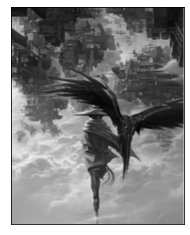

In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("messi5.jpg",0)
plt.imshow(img,cmap="gray",interpolation = "bicubic")
plt.xticks([]),plt.yticks([])#to hide tick values on X and Y axis
plt.show()

<table><tr><td bgcolor='yellow'>参见：Matplotib有多种绘图选择。具体可以参见Matplotibdocs。我们也会陆续了解一些</td></tr></table>

<table><tr><td bgcolor='green'><p algin=left>注意：彩色图像使用OpenCV加载时是BGR模式。但是Matplotib是RGB模式。所以彩色图像如果已经被OpenCV读取，那它将不会被Matplotib正确显示。具体细节请看练习</p></td></tr></table>

附加资源：
- [Matplotlib Plotting Styles and Features](https://matplotlib.org/api/pyplot_api.html)
- 用 OpenCV 加载一个彩色图像，并用Matplotib显示它时会遇到一些困难。请阅读[this discussion](https://stackoverflow.com/questions/15072736/extracting-a-region-from-an-image-using-slicing-in-python-opencv/15074748#15074748)
代码演示如下：

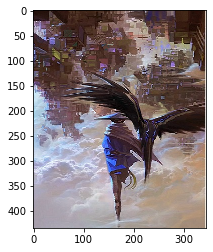

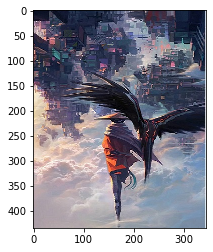

In [28]:
# 用matpotlib显示彩色图
imgplt = cv2.imread('messi5.jpg', 1)
plt.imshow(imgplt)
plt.show()
    #特别注意显示是按RGB的顺序去读，cv2.imread()是按GBR的顺序去读，
    #所以显示出来的图像颜色跟原图有区别
imageRGB = cv2.cvtColor(imgplt, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

## 1.6像素操作

In [11]:
img = cv2.imread('messi5.jpg', 1)
(b, g, r) = img[100, 100]
print(b, g, r) #bgr

#绘制横线  100 10---->400 100
for i in range(1, 300):
    img[100, 10+i] = (0, 0, 255)#标准的红色
cv2.imshow('image', img)
cv2.waitKey(0) #参数为2000表示停留2000ms
cv2.destroyAllWindows()

68 52 35
